IMPORTAZIONE LIBRERIE

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import glob
import array 
import scipy.signal as signal
#Processing libraries
from sklearn.preprocessing import StandardScaler,MinMaxScaler
import seaborn as sns
from scipy.stats import zscore
from sklearn.multiclass import OneVsRestClassifier

# Model libraries
from sklearn.linear_model import LogisticRegression, SGDClassifier, Perceptron
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE

# Testing libraries
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, GridSearchCV, learning_curve
from sklearn.metrics import accuracy_score, log_loss, confusion_matrix, classification_report, roc_curve, auc

# remove warnings
import warnings
warnings.filterwarnings('ignore')

CAMBIO PATH PER ANALISI RISPETTO AL LOG DI VOLO CONSIDERAT

In [2]:
path_file = os.path.abspath(os.getcwd())
print(path_file)
os.chdir(path_file)

c:\Users\chiar\OneDrive\Desktop\MantenzionePreventiva\ProgettoManutenzionePreventiva


ARRAY CHE CONTERRA' I DATAFRAME DI CIASCUN VOLO (PER UN TOTALE DI 18)

In [3]:
data_path = os.path.join(path_file,'*.csv') #lista di tutti gli elementi di estensione csv nella cartella path
csv_list = glob.glob(data_path) #converte data path in un output Unix-like (ls) (*.csv -> lista di elementi con estensione csv)
dataframe_collection = []
df_1 = pd.DataFrame()

# ciclo per scorrere tutti i csv
for csv_file in csv_list: # ciclo che scorre i csv nella cartella path
    df = pd.read_csv(csv_file) 
    #df = df.to_numpy()
    #df = df.to_records(index=False)
    #dataframe_collection.append(df)
    df_1 = df_1.append(df,ignore_index=True)
    #print(df)

# ciclo per scorrere tutti i csv
for csv_file in csv_list: # ciclo che scorre i csv nella cartella path
    df = pd.read_csv(csv_file) 
    #df = df.to_numpy()
    df = df.to_records(index=False)
    dataframe_collection.append(df)

#prova = pd.DataFrame(dataframe_collection)


In [4]:
print(df_1)

      tempo  <>(GyrX)  var(GyrX)  kurt(GyrX)  RMS(GyrX)  freq1(GyrX)  \
0       0.0 -0.032100   0.017081   -0.399284   0.134398         78.0   
1       1.0 -0.032346   0.017054   -0.400010   0.134356        102.0   
2       2.0 -0.032590   0.017026   -0.400594   0.134314         98.0   
3       3.0 -0.032832   0.016999   -0.401113   0.134271        102.0   
4       4.0 -0.033265   0.017017   -0.412325   0.134447        102.0   
...     ...       ...        ...         ...        ...          ...   
1344   62.0 -0.048472   0.006254   -0.082119   0.092673          0.0   
1345   63.0 -0.048289   0.006253   -0.081993   0.092571          0.0   
1346   64.0 -0.048212   0.006240   -0.075446   0.092463          0.0   
1347   65.0 -0.048179   0.006225   -0.068067   0.092367          0.0   
1348   66.0 -0.048194   0.006211   -0.061448   0.092295          0.0   

      freq2(GyrX)  amp1(GyrX)  amp2(GyrX)  <>(GyrY)  ...  amp2(RPM(ESC_5))  \
0            96.0    3.596543    3.414090 -0.014483  ... 

In [5]:
df_1 = df_1.sample(frac=1).reset_index(drop=True)
print(df_1)

      tempo  <>(GyrX)  var(GyrX)  kurt(GyrX)  RMS(GyrX)  freq1(GyrX)  \
0      42.0 -0.140693   0.040716   -1.511925   0.245779         90.0   
1      19.0 -0.139718   0.033273   -0.777365   0.229574          0.0   
2      88.0 -0.001811   0.007055   -0.249857   0.083915          0.0   
3      13.0  0.008037   0.007620   -0.473786   0.087542         81.0   
4      82.0 -0.014177   0.058472    1.867120   0.241946         90.0   
...     ...       ...        ...         ...        ...          ...   
1344   20.0 -0.044356   0.018897   -0.849644   0.144269         79.0   
1345   16.0 -0.114553   0.040057   -0.469620   0.230370         54.0   
1346   75.0 -0.009756   0.056919    1.966266   0.238497         97.0   
1347    4.0 -0.036411   0.027369    1.476947   0.169167         79.0   
1348   45.0 -0.121860   0.038098   -0.362378   0.229894         86.0   

      freq2(GyrX)  amp1(GyrX)  amp2(GyrX)  <>(GyrY)  ...  amp2(RPM(ESC_5))  \
0            91.0    5.239359    5.119505  0.027700  ... 

In [6]:
df_1 = df_1.drop(['tempo'], axis=1)
print(df_1)

      <>(GyrX)  var(GyrX)  kurt(GyrX)  RMS(GyrX)  freq1(GyrX)  freq2(GyrX)  \
0    -0.140693   0.040716   -1.511925   0.245779         90.0         91.0   
1    -0.139718   0.033273   -0.777365   0.229574          0.0        110.0   
2    -0.001811   0.007055   -0.249857   0.083915          0.0        123.0   
3     0.008037   0.007620   -0.473786   0.087542         81.0         76.0   
4    -0.014177   0.058472    1.867120   0.241946         90.0        114.0   
...        ...        ...         ...        ...          ...          ...   
1344 -0.044356   0.018897   -0.849644   0.144269         79.0         60.0   
1345 -0.114553   0.040057   -0.469620   0.230370         54.0         53.0   
1346 -0.009756   0.056919    1.966266   0.238497         97.0         96.0   
1347 -0.036411   0.027369    1.476947   0.169167         79.0         78.0   
1348 -0.121860   0.038098   -0.362378   0.229894         86.0         65.0   

      amp1(GyrX)  amp2(GyrX)  <>(GyrY)  var(GyrY)  ...  amp2(RP

In [7]:
correlated_features = set()
correlation = df_1[df_1.columns[1:]].corr()['Guasto'][:].abs()
correlation = correlation.loc[lambda x : ((x > 0.7) & (x < 1))]
index = correlation.index
print(index)
df_1 = df_1.drop([col for col in df_1.columns if col in index],axis=1)
print(df_1.columns)

Index(['<>(RPM(ESC_5))', 'RMS(RPM(ESC_5))'], dtype='object')
Index(['<>(GyrX)', 'var(GyrX)', 'kurt(GyrX)', 'RMS(GyrX)', 'freq1(GyrX)',
       'freq2(GyrX)', 'amp1(GyrX)', 'amp2(GyrX)', '<>(GyrY)', 'var(GyrY)',
       ...
       'amp2(RPM(ESC_5))', '<>(Curr(ESC_5))', 'var(Curr(ESC_5))',
       'kurt(Curr(ESC_5))', 'RMS(Curr(ESC_5))', 'freq1(Curr(ESC_5))',
       'freq2(Curr(ESC_5))', 'amp1(Curr(ESC_5))', 'amp2(Curr(ESC_5))',
       'Guasto'],
      dtype='object', length=167)


In [8]:
index_list = [340]
df_test = df_1.query('index in @index_list')
#df_test = pd.DataFrame(df_test)
print(df_test)

     <>(GyrX)  var(GyrX)  kurt(GyrX)  RMS(GyrX)  freq1(GyrX)  freq2(GyrX)  \
340 -0.056494   0.005982    0.011133   0.095698          0.0        112.0   

     amp1(GyrX)  amp2(GyrX)  <>(GyrY)  var(GyrY)  ...  amp2(RPM(ESC_5))  \
340   12.902427    3.294774  0.031121   0.003706  ...      18685.682554   

     <>(Curr(ESC_5))  var(Curr(ESC_5))  kurt(Curr(ESC_5))  RMS(Curr(ESC_5))  \
340         3.491614          0.588191          -1.245761          3.574633   

     freq1(Curr(ESC_5))  freq2(Curr(ESC_5))  amp1(Curr(ESC_5))  \
340               109.0               108.0          28.801188   

     amp2(Curr(ESC_5))  Guasto  
340           9.946064       0  

[1 rows x 167 columns]


In [9]:
# Drop values to avoid multicolinearity
df_test = df_test.drop(['Guasto'], axis=1)

In [10]:
#df_1 = df_1.drop([df_1.index[1330], df_1.index[1331]])
df_1 = df_1.drop([df_1.index[340]])
print(df_1)

      <>(GyrX)  var(GyrX)  kurt(GyrX)  RMS(GyrX)  freq1(GyrX)  freq2(GyrX)  \
0    -0.140693   0.040716   -1.511925   0.245779         90.0         91.0   
1    -0.139718   0.033273   -0.777365   0.229574          0.0        110.0   
2    -0.001811   0.007055   -0.249857   0.083915          0.0        123.0   
3     0.008037   0.007620   -0.473786   0.087542         81.0         76.0   
4    -0.014177   0.058472    1.867120   0.241946         90.0        114.0   
...        ...        ...         ...        ...          ...          ...   
1344 -0.044356   0.018897   -0.849644   0.144269         79.0         60.0   
1345 -0.114553   0.040057   -0.469620   0.230370         54.0         53.0   
1346 -0.009756   0.056919    1.966266   0.238497         97.0         96.0   
1347 -0.036411   0.027369    1.476947   0.169167         79.0         78.0   
1348 -0.121860   0.038098   -0.362378   0.229894         86.0         65.0   

      amp1(GyrX)  amp2(GyrX)  <>(GyrY)  var(GyrY)  ...  amp2(RP

### Bilanciamento del dataset

In [11]:
x = df_1.iloc[:,:-1]
y = df_1.iloc[:,-1:]

In [12]:
oversample = SMOTE()
x, y = oversample.fit_resample(x,y)
print(x)

      <>(GyrX)  var(GyrX)  kurt(GyrX)  RMS(GyrX)  freq1(GyrX)  freq2(GyrX)  \
0    -0.140693   0.040716   -1.511925   0.245779    90.000000    91.000000   
1    -0.139718   0.033273   -0.777365   0.229574     0.000000   110.000000   
2    -0.001811   0.007055   -0.249857   0.083915     0.000000   123.000000   
3     0.008037   0.007620   -0.473786   0.087542    81.000000    76.000000   
4    -0.014177   0.058472    1.867120   0.241946    90.000000   114.000000   
...        ...        ...         ...        ...          ...          ...   
1618 -0.030941   0.009983    2.063260   0.104478    66.828838    89.539270   
1619 -0.030669   0.009987    2.069862   0.104414    63.072424    83.120707   
1620 -0.129136   0.041590   -1.540845   0.241149    67.464275    87.464275   
1621 -0.129625   0.041621   -1.541976   0.241475    71.379333    90.974166   
1622 -0.119289   0.040306   -1.533270   0.233285    66.000000    81.066786   

      amp1(GyrX)  amp2(GyrX)  <>(GyrY)  var(GyrY)  ...  amp1(RP

# Selezione feature più importanti

In [13]:
from sklearn.feature_selection import SelectKBest, mutual_info_classif, f_classif, f_regression
fvalue_Best = SelectKBest(score_func=f_regression, k=40)
fit = fvalue_Best.fit(x, y)
print(fit)
print(fvalue_Best.get_support())

SelectKBest(k=40, score_func=<function f_regression at 0x00000218A3BB9120>)
[ True False False False  True False False False  True  True False  True
  True False  True  True False  True  True  True False False  True False
 False False False False  True False  True False  True False  True  True
 False False False False False False False False False False False False
 False False False False False False False False False  True False  True
 False False  True False False False False False False False False False
 False False False False  True  True  True False  True  True False  True
 False False False False False False False False  True  True False False
 False  True False False False False False False  True False False  True
 False False False False False  True False False False False False False
 False False False False  True  True False False False False False False
 False False False False False False  True False False False False False
 False False False False False False False False

In [14]:
features_score = pd.DataFrame(fit.scores_)
features_score = zscore(features_score)
features = pd.DataFrame(x.columns)
feature_score = pd.concat([features,features_score],axis=1)
# Assigning column names
feature_score.columns = ["Input_Features","F_Score"]
print(feature_score.nlargest(60,columns="F_Score"))

        Input_Features   F_Score
34          kurt(AccY)  5.272668
28         freq1(AccX)  3.522740
12         freq1(GyrY)  3.094943
11           RMS(GyrY)  2.865973
9            var(GyrY)  2.695944
153   kurt(RPM(ESC_5))  2.639151
93   freq2(RPM(ESC_1))  2.588466
92   freq1(RPM(ESC_1))  2.568913
14          amp1(GyrY)  2.458339
159   var(Curr(ESC_5))  2.165566
104     <>(RPM(ESC_2))  2.008228
152    var(RPM(ESC_5))  1.847251
8             <>(GyrY)  1.839627
78    amp1(RPM(ESC_0))  1.742688
107    RMS(RPM(ESC_2))  1.696104
32            <>(AccY)  1.550748
22          amp1(GyrZ)  1.536604
62         amp1(Pitch)  1.268299
30          amp1(AccX)  1.137126
17           var(GyrZ)  1.036707
80     <>(Curr(ESC_0))  1.022921
76   freq1(RPM(ESC_0))  0.995610
4          freq1(GyrX)  0.969798
19           RMS(GyrZ)  0.917097
57          var(Pitch)  0.914433
77   freq2(RPM(ESC_0))  0.846752
156   amp1(RPM(ESC_5))  0.744291
97    var(Curr(ESC_1))  0.723042
83    RMS(Curr(ESC_0))  0.628757
81    var(

In [15]:
i=0
index_false=[]
for el in list(fvalue_Best.get_support()):
    if not el:
        index_false.append(i)
    i=i+1
print(index_false)

[1, 2, 3, 5, 6, 7, 10, 13, 16, 20, 21, 23, 24, 25, 26, 27, 29, 31, 33, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 58, 60, 61, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 79, 82, 84, 85, 86, 87, 88, 89, 90, 91, 94, 95, 96, 98, 99, 100, 101, 102, 103, 105, 106, 108, 109, 110, 111, 112, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 154, 155, 157, 160, 161, 162, 163, 164, 165]


In [16]:
x=x.drop(x.columns[index_false],axis = 1)
print(x)

      <>(GyrX)  freq1(GyrX)  <>(GyrY)  var(GyrY)  RMS(GyrY)  freq1(GyrY)  \
0    -0.140693    90.000000  0.027700   0.008890   0.098159    71.000000   
1    -0.139718     0.000000  0.011290   0.004088   0.064844    70.000000   
2    -0.001811     0.000000  0.012615   0.005234   0.073358   113.000000   
3     0.008037    81.000000  0.019775   0.005646   0.077599    82.000000   
4    -0.014177    90.000000 -0.040774   0.034827   0.190811     0.000000   
...        ...          ...       ...        ...        ...          ...   
1618 -0.030941    66.828838 -0.009239   0.006052   0.078246   108.236811   
1619 -0.030669    63.072424 -0.009114   0.006048   0.078204   108.000000   
1620 -0.129136    67.464275  0.024802   0.009195   0.098921     0.000000   
1621 -0.129625    71.379333  0.025134   0.009231   0.099182     0.000000   
1622 -0.119289    66.000000  0.019351   0.008616   0.094690     0.000000   

      amp1(GyrY)  amp2(GyrY)  var(GyrZ)  kurt(GyrZ)  ...  RMS(RPM(ESC_2))  \
0       1.

In [17]:
df_test=df_test.drop(df_test.columns[index_false],axis = 1)
print(df_test)

     <>(GyrX)  freq1(GyrX)  <>(GyrY)  var(GyrY)  RMS(GyrY)  freq1(GyrY)  \
340 -0.056494          0.0  0.031121   0.003706   0.068296        107.0   

     amp1(GyrY)  amp2(GyrY)  var(GyrZ)  kurt(GyrZ)  ...  RMS(RPM(ESC_2))  \
340     3.85044    1.227423    0.01348   -1.275407  ...      5180.819661   

     var(Curr(ESC_2))  freq1(RPM(ESC_3))  freq2(RPM(ESC_3))  kurt(RPM(ESC_4))  \
340          1.245697               93.0               92.0         -1.143363   

     var(RPM(ESC_5))  kurt(RPM(ESC_5))  amp1(RPM(ESC_5))  <>(Curr(ESC_5))  \
340     1.078228e+06         -1.432923      27242.902547         3.491614   

     var(Curr(ESC_5))  
340          0.588191  

[1 rows x 40 columns]


In [18]:
correlated_features = set()
correlation_matrix = x.corr()

for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if (correlation_matrix.iloc[i, j] > 0.8) | (correlation_matrix.iloc[i, j] < -0.5):
            colname = correlation_matrix.columns[i]
            correlated_features.add(colname)

x = x.drop([col for col in x.columns if col in correlated_features],axis=1)
print(x)

      <>(GyrX)  freq1(GyrX)  <>(GyrY)  var(GyrZ)  kurt(GyrZ)  RMS(GyrZ)  \
0    -0.140693    90.000000  0.027700   0.005506   -1.075868   0.151809   
1    -0.139718     0.000000  0.011290   0.008475   -1.356382   0.167247   
2    -0.001811     0.000000  0.012615   0.005392   -0.798026   0.153432   
3     0.008037    81.000000  0.019775   0.005949   -0.899916   0.163363   
4    -0.014177    90.000000 -0.040774   0.017577   -1.508257   0.213257   
...        ...          ...       ...        ...         ...        ...   
1618 -0.030941    66.828838 -0.009239   0.004442   -1.295932   0.110389   
1619 -0.030669    63.072424 -0.009114   0.004455   -1.300452   0.110468   
1620 -0.129136    67.464275  0.024802   0.005606   -0.874458   0.156112   
1621 -0.129625    71.379333  0.025134   0.005600   -0.877574   0.156004   
1622 -0.119289    66.000000  0.019351   0.005725   -0.817954   0.157976   

      amp1(GyrZ)  var(Curr(ESC_1))  <>(RPM(ESC_2))  var(Curr(ESC_2))  \
0       1.432936          0

In [19]:
df_test=df_test.drop([col for col in df_test.columns if col in correlated_features],axis=1)
print(df_test)

     <>(GyrX)  freq1(GyrX)  <>(GyrY)  var(GyrZ)  kurt(GyrZ)  RMS(GyrZ)  \
340 -0.056494          0.0  0.031121    0.01348   -1.275407   0.220944   

     amp1(GyrZ)  var(Curr(ESC_1))  <>(RPM(ESC_2))  var(Curr(ESC_2))  \
340    5.287814          0.053693     4984.306878          1.245697   

     kurt(RPM(ESC_4))  
340         -1.143363  


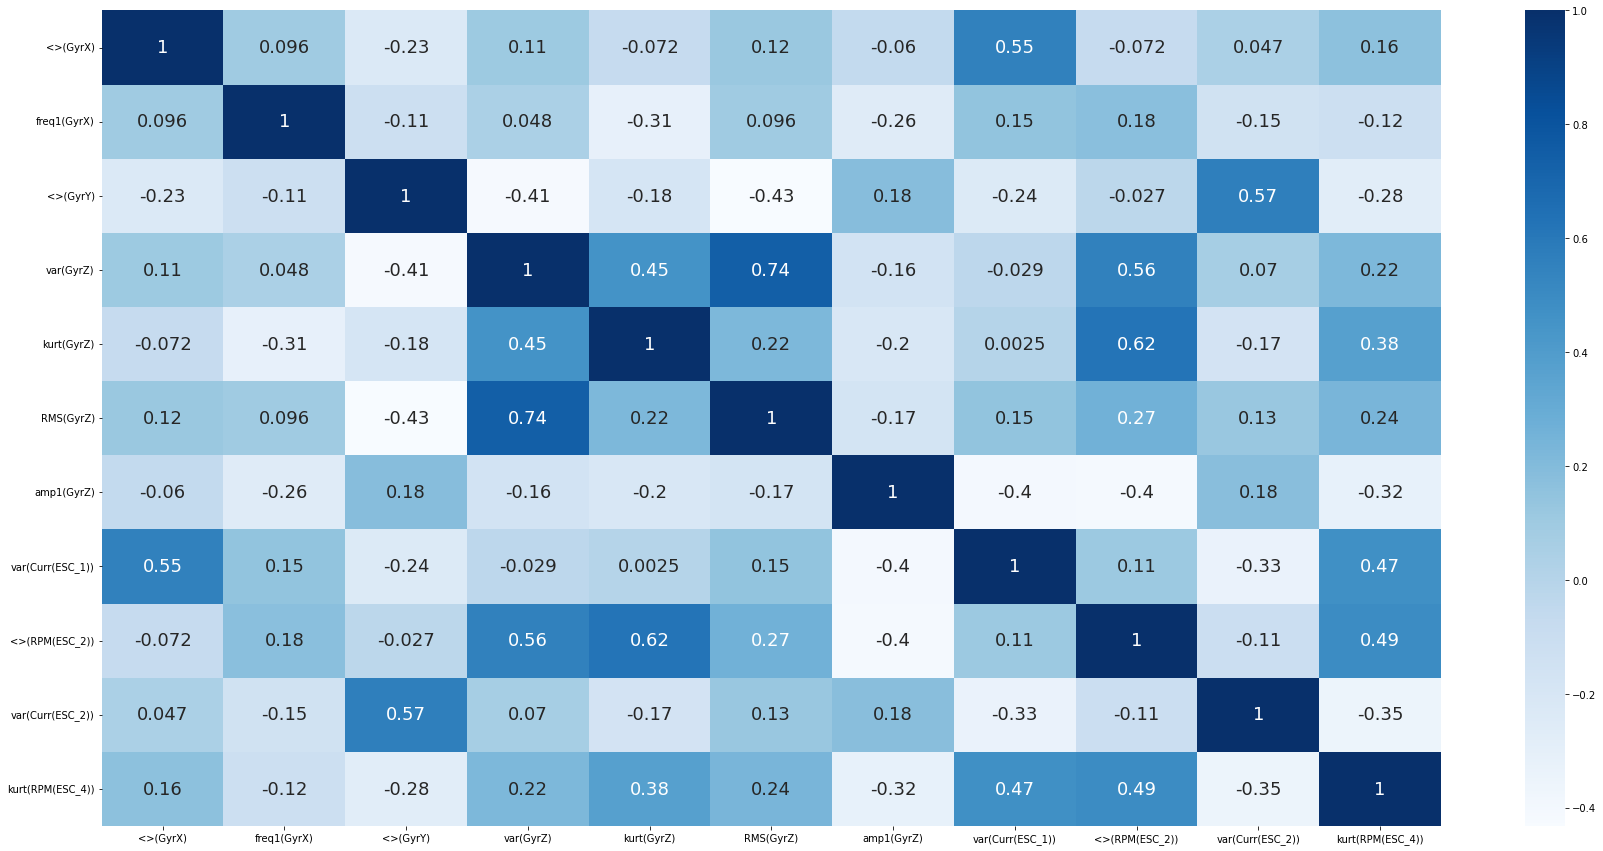

In [20]:
plt.figure(figsize=(30,15))
ax = sns.heatmap(x[x.columns].corr(),cmap="Blues",annot=True,annot_kws={"size": 18})

### Separazione del dataset in training e test

In [21]:
# Random state
rs = 42

# Split the data to check which algorithms learn better (later on we can check )
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=rs)
y_train = y_train.astype(int)
y_test = y_test.astype(int)

# look at the shape of the data (many problems can arise from wrong shape)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1298, 11)
(325, 11)
(1298, 1)
(325, 1)


In [22]:
from sklearn.calibration import CalibratedClassifierCV

# List of classifiers:
classifiers = [
    LogisticRegression(random_state = rs),
    SVC(probability=True),
    MLPClassifier(random_state=rs), # Multi Layer Perceptron
    SGDClassifier(random_state=rs) # Stochastic Gradient Descent 
]

# List of results that will occure:
clf_name = [] # names of the classifiers
model_results = pd.DataFrame.copy(y_test) #resulting of prediction from the models

kfold = StratifiedKFold(n_splits=5) #cross-validation
cv_results = [] # scores from cross validation
cv_acc = [] # mean accuracy from cross validation, need to maximize
cv_std = [] # standard deviation from cross validation, need to minimise

cnfm = [] #confusion matrix
clr = [] #classification report
roc_auc = [] #roc curve:
roc_tpr = []
roc_fpr = []

### Classificazione

Cross-Validation: [0.78076923 0.77692308 0.81153846 0.77992278 0.76061776]
Accuracy: 0.82 	 ---> LogisticRegression 
Test: 0    1
Name: Guasto_test, dtype: int64


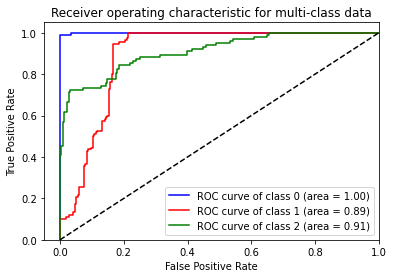

----------------------------------------------------
Cross-Validation: [0.66923077 0.65769231 0.64230769 0.66023166 0.63706564]
Accuracy: 0.65 	 ---> SVC 
Test: 0    1
Name: Guasto_test, dtype: int64


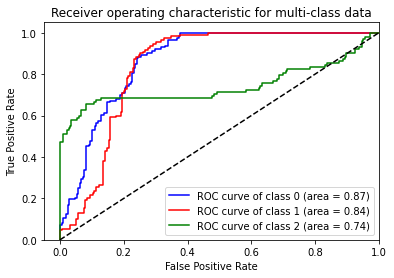

----------------------------------------------------
Cross-Validation: [0.51923077 0.51538462 0.51538462 0.55984556 0.36679537]
Accuracy: 0.65 	 ---> MLPClassifier 
Test: 0    1
Name: Guasto_test, dtype: int64


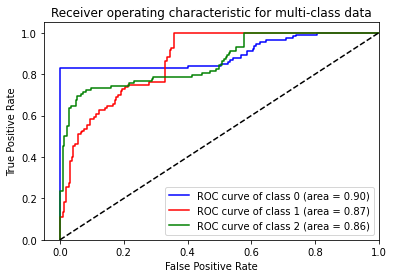

----------------------------------------------------
Cross-Validation: [0.43076923 0.33076923 0.33076923 0.33590734 0.56370656]
Accuracy: 0.35 	 ---> SGDClassifier 
Test: 0    1
Name: Guasto_test, dtype: int64


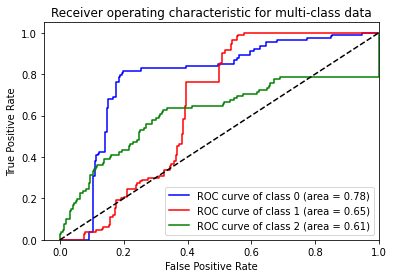

----------------------------------------------------


In [23]:
from itertools import cycle
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import LabelBinarizer

n_classes = 3

j=0
# Training the algorithms and results
for clf in classifiers:
    name = clf.__class__.__name__
    clf_name.append(name)
    
    
    #fitting and predictions
    model = clf.fit(x_train, y_train.values.ravel())
    y_pred = model.predict(x_test)
    model_results[name] = y_pred
    
    #accuracy and log loss
    cv_results.append(cross_val_score(clf, x_train, y_train.values.ravel(), scoring = "accuracy",cv = kfold)) # qui invece abbiamo cross validation
    acc = round(accuracy_score(y_test.values.ravel(), y_pred), 2) # accuratezza semplice con training e test
    train_pred = clf.predict(x_test)
    print(f'Cross-Validation: {cross_val_score(clf, x_train, y_train.values.ravel(), scoring = "accuracy",cv = kfold)}') 
    
    print(f'Accuracy: {acc} \t ---> {name} ')

    guasto_pred = pd.Series(model.predict(df_test), name='Guasto_test')
    conteggio = guasto_pred.value_counts()
    print(f'Test: {conteggio}')    
    
    #confusion matrix, clasification report, roc curve
    cnfm.append(confusion_matrix(y_test.values.ravel(), y_pred))
    clr.append(classification_report(y_test.values.ravel(), y_pred))
    #fpr, tpr, thresholds = roc_curve(y_pred, y_test.values.ravel(), pos_label=1)

    if j != 2:
        clf = OneVsRestClassifier(clf)
        y_score = clf.fit(x_train, y_train).decision_function(x_test)
    else:
        y_score = clf.fit(x_train, y_train).predict_proba(x_test)

       

    lb = LabelBinarizer()
    y_true_bin = lb.fit_transform(y_test)

    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_true_bin[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
    colors = cycle(['blue', 'red', 'green'])
    for i, color in zip(range(n_classes), colors):
        plt.plot(fpr[i], tpr[i], color=color, lw=1.5,
                label='ROC curve of class {0} (area = {1:0.2f})'
                ''.format(i, roc_auc[i]))
    plt.plot([0, 1], [0, 1], 'k--', lw=1.5)
    plt.xlim([-0.05, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic for multi-class data')
    plt.legend(loc="lower right")
    plt.show()
    
    j += 1

    print("----------------------------------------------------")

for i in cv_results:
    cv_acc.append(i.mean())
    cv_std.append(i.std())


### Matrici di confusione

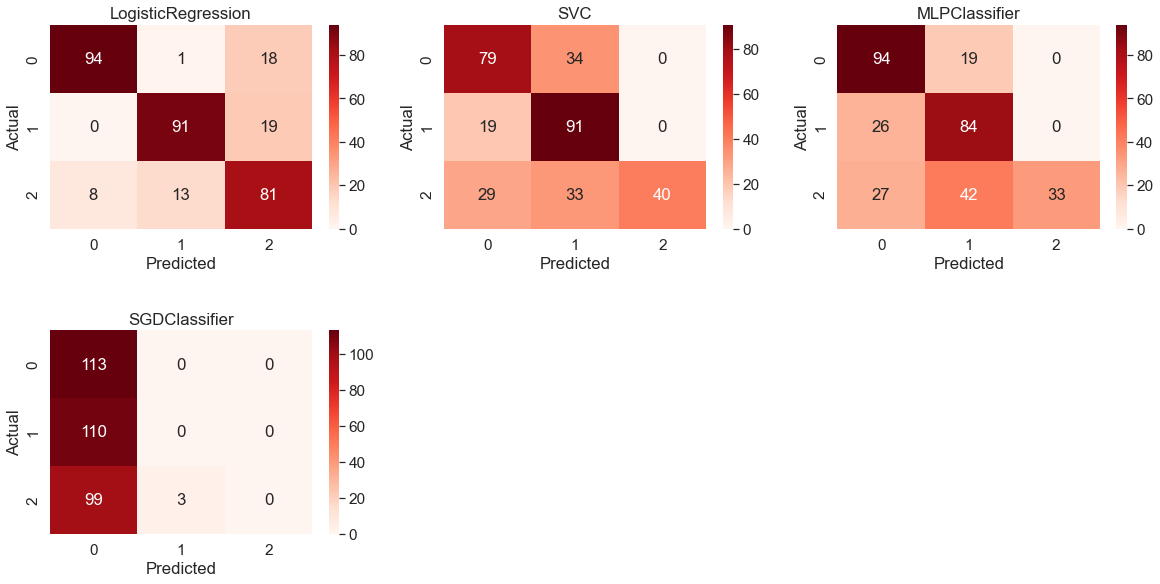

In [24]:
import seaborn as sns
# Confusion matrixes (not-normalized confusion matrix)
plt.figure(figsize=(20,15))
sns.set(font_scale=1.4)
for i in range(len(classifiers)):
    plt.subplot(3,3,i+1) #adjust this acourding to the number of algorithms
    sns.heatmap(cnfm[i], annot=True, fmt="d",cmap="Reds")
    plt.subplots_adjust(hspace = 0.5)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(clf_name[i])

Cross Validation Scores

Text(0.5, 1.0, 'Cross validation scores')

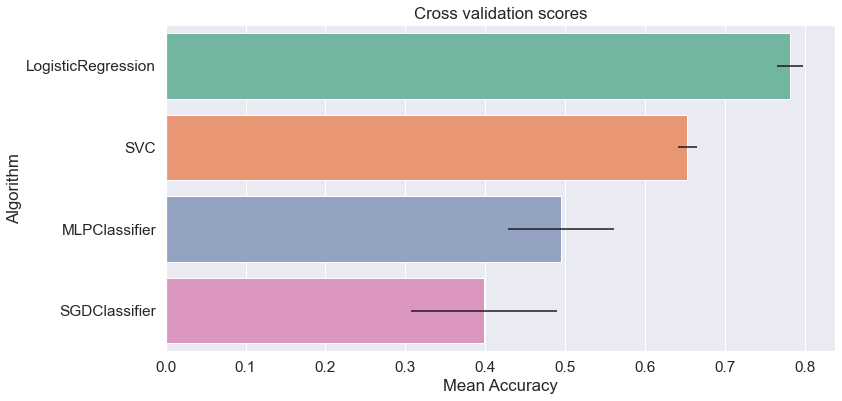

In [25]:
# Cross validation accuracy results graph
cv_res = pd.DataFrame({"CrossValMeans":cv_acc, "CrossValerrors": cv_std,"Algorithm":clf_name})

plt.figure(figsize=(12,6))
sns.barplot(x="CrossValMeans",y="Algorithm",data = cv_res, palette="Set2",orient = "h",**{'xerr':cv_std})
plt.xlabel("Mean Accuracy")
plt.title("Cross validation scores")

Report Classificazione

In [26]:
#Classification reports
for i in range(len(classifiers)):
    print (f"{clf_name[i]} Classification Report:" )
    print (clr[i])

LogisticRegression Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.83      0.87       113
           1       0.87      0.83      0.85       110
           2       0.69      0.79      0.74       102

    accuracy                           0.82       325
   macro avg       0.82      0.82      0.82       325
weighted avg       0.83      0.82      0.82       325

SVC Classification Report:
              precision    recall  f1-score   support

           0       0.62      0.70      0.66       113
           1       0.58      0.83      0.68       110
           2       1.00      0.39      0.56       102

    accuracy                           0.65       325
   macro avg       0.73      0.64      0.63       325
weighted avg       0.73      0.65      0.64       325

MLPClassifier Classification Report:
              precision    recall  f1-score   support

           0       0.64      0.83      0.72       113
           1       0.58